In [2]:


from utils import *

%matplotlib inline
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True 
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['font.size'] = 12

from dust_extinction.parameter_averages import G23 as ext_model


Here you have to set the path where the files are

In [3]:

dust_path='./Q-curves/fitting-Qcurves/Q_GRF/'
slab_folder='./LineData/'

# examples

Below you find a list of use cases for the model

## Varibale dicts

First you see example dictonaries with all the input parameters

- distance: distance to object in pc


- tstar: stellar temperature in Kelvin
- rstar: stellar radius in solar radii
- bb_star: bool, True: using the stellar temperature to create a Black body, False: using input spectum (read_data(stellar_file))


- if t_rim is set: rim is black body with temperature t_rim


- if tmax_rim, tmin_rim, and q_rim are set: rim is temperature power law distribution


    - tmax_rim: maximum temperature of inner rim
    - tmin_rim: minimum temperature of inner rim
    - q_rim: exponent of the temperature powerlaw distribution
    - sc_rim: scale factor of the rim

- tmax_mp: maximum temperature of midplane
- tmin_mp: minimum temperature of midplane
- q_mid: exponent of the temperature powerlaw distribution
- sc_mid: scale factor of the midplane


- tmax_s: maximum temperature of surface layer
- tmin_s: minimum temperature of surface layer
- q_thin: exponent of the temperature powerlaw distribution

- the species (their Q-files) and their scaling factors (sc) are defined in dust_species

- q_emis: exponent of the temperature powerlaw distribution for the molecular layer




In [4]:
# this dictionary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-17,
         'sc_mid':2e-7,
         'q_mid':-0.6,
         'q_thin':-0.55,
#         'q_emis':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0,
         }


## Abundance dict

The second dictonary that is needed to run the model is the abundance_dict.

It sets what dust components are used and their scale factors.

The names of the species should be their file names.

with dust_path you can specify the folder in which there files are


In [5]:
#here all factors are the same, but they can be different of course
test_fac=5e-8
test_fac_crystal=1e-8

abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac_crystal,
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac_crystal,
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac_crystal,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac_crystal,
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac_crystal,
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac_crystal}

# Slab dict

The third dictonary needed to run the model is the slab dict.

It contains all molecules for which the emission should be included in the model

Every molecule has a column density range, a temperature range and an emitting radius (scale factor).  
You can also run it with a single value for the column density or a single value for both temperature and column density.

- ColDens: fixed column density  
or  
- ColDens_tmin: column density at tmin
- ColDens_tmax: column density at tmax

- temis: emission temperature  
or   
- tmin: minimum emission temperature
- tmax: maximum emission temperature

- radius: inner radius where the temperature power law starts (for t-ranges), for single value temperatures it is the radius of the emitting area

In [14]:
slab_dict={
            'CO2':{'ColDens':1e16,
                    'temis':500,
                     'radius':0.4
                    },
            'HCN':{'ColDens':5e15,
                    'temis':500,
                     'radius':0.5
                    },
            'C2H2':{'ColDens':1e16,
                    'temis':600,
                     'radius':0.2
                     
                    },
            'H2O':{'ColDens':1e17,
                    'tmax':655.1,
                    'tmin':220.6,
                    'r_area':1
                    },

          }

## running the model

To run the model you need to do 3 steps

- initialize
- read in the data
- run the model

### step one

initializing is done with
continuum_model()

you should save that under a name ({name_model})


In [20]:

mod=complete_model()


In [21]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=4.9,lambda_n=28,R=500)

In [22]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,#wavelength_points=wavelength,
              slab_prefix='15_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Updateing Slab wave
-------
There are not all parameters for the absorp layer set!!!
tmax_abs is not defined
-------
-------
There are not all parameters for the absorp layer set!!!
tmin_abs is not defined
-------
-------
There are not all parameters for the absorp layer set!!!
q_abs is not defined
-------
Precalculating Black bodies


### Running the model


Init 0.00020503997802734375
Star 0.0005838871002197266
Inner rim 0.0002989768981933594
Midplane 0.03138399124145508
Surface 0.012443065643310547
Emission 0.0054399967193603516
Summing up 0.0008947849273681641


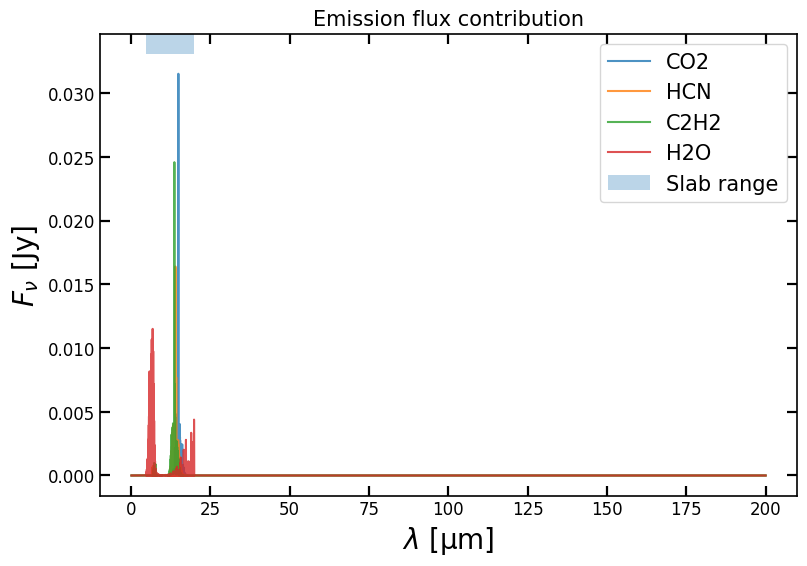

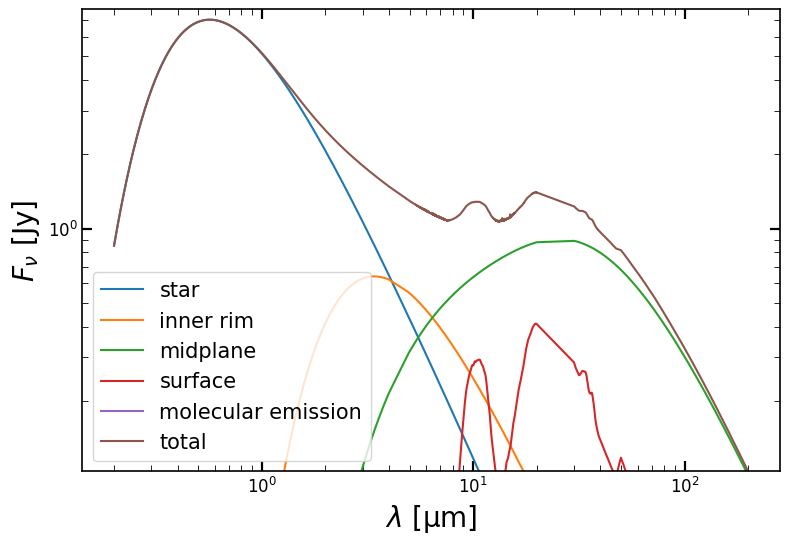

In [23]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


# Exploring the model

-----------
CO2
-----------
HCN
-----------
C2H2
-----------
H2O
ColDens_tmin 220.6
ColDens_slope 0.0
logColDens_min 17.0
inner_part_temp [300 350 400 450 500 550 600]
inner_part [3.38581755e-18 4.85896838e-18 5.94118077e-18 6.58537480e-18
 6.85745651e-18 6.85312099e-18 6.66106741e-18]
upper_in_temp 650
lower_in_temp 250
upper_in 3.1756827700103254e-18
lower_in 8.98436685444587e-19
lower_out_temp 220.6
upper_out_temp 655.1
lower_out 9.817498251439516e-19
upper_out 6.46717107069199e-19
-----------
----------------
Keys in output dict
CO2
-----------
CO2
----------------
Keys in output dict
HCN
-----------
HCN
----------------
Keys in output dict
C2H2
-----------
C2H2
----------------
Keys in output dict
H2O
ColDens_tmin
220.6
ColDens_slope
0.0
logColDens_min
17.0
inner_part_temp
[300 350 400 450 500 550 600]
inner_part
[3.38581755e-18 4.85896838e-18 5.94118077e-18 6.58537480e-18
 6.85745651e-18 6.85312099e-18 6.66106741e-18]
upper_in_temp
650
lower_in_temp
250
upper_in
3.175682770010325

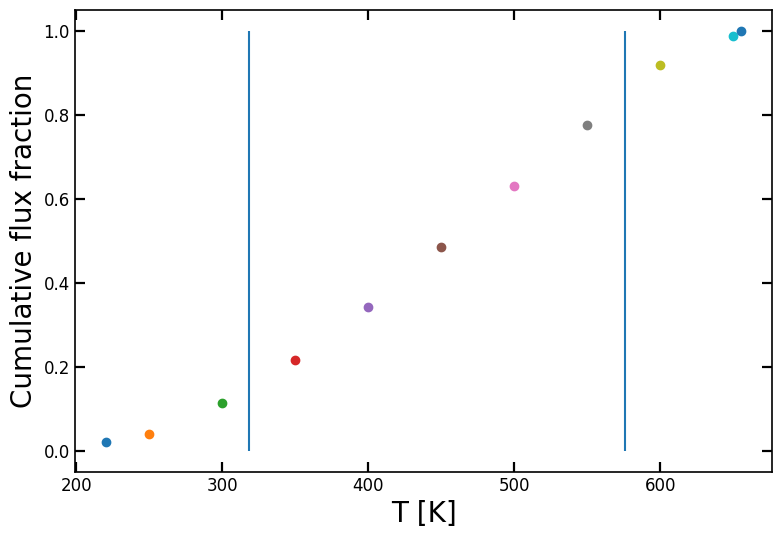

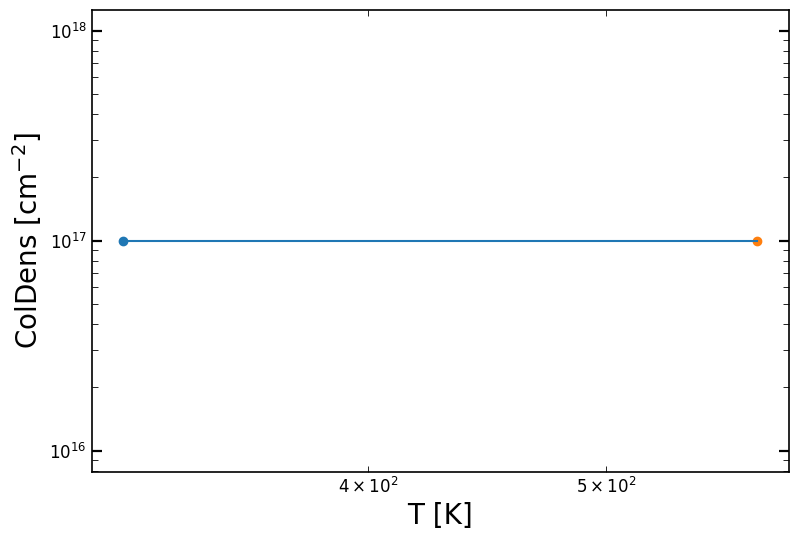

tmax,tmin 655.1 220.6
t at max,t at min 575.9465274465539 318.1194002790877
total radial range
0.13954997758842866 1.0096901486322083


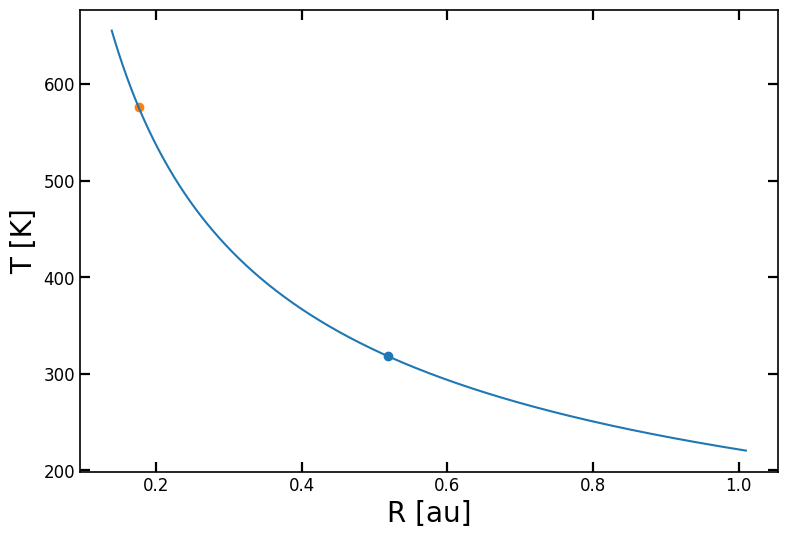

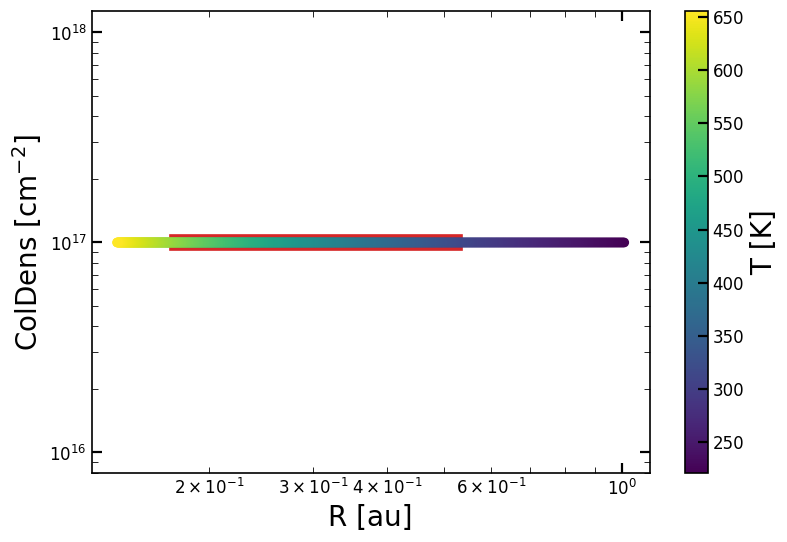

{'CO2': {'tmin,tmax': [500, 500],
  'cmin,cmax': [1e+16, 1e+16],
  'rout,rin': [0.4, 0],
  'radius_eff': 0.4},
 'HCN': {'tmin,tmax': [500, 500],
  'cmin,cmax': [5000000000000000.0, 5000000000000000.0],
  'rout,rin': [0.5, 0],
  'radius_eff': 0.5},
 'C2H2': {'tmin,tmax': [600, 600],
  'cmin,cmax': [1e+16, 1e+16],
  'rout,rin': [0.2, 0],
  'radius_eff': 0.2},
 'H2O': {'radius_eff': 0.4880614782295036,
  'tmin,tmax': [318.1194002790877, 575.9465274465539],
  'cmin,cmax': [1e+17, 1e+17],
  'rout,rin': [0.518949531849548, 0.17636499107049786]}}

In [24]:
#calculating where the emission in the model is coming from
mod.extract_emission_quantities(debug=True)

In [26]:
mod.calc_mol_masses(temp_brackets=[[0,300],[300,2000]])

/Users/t.kaeufer/Library/CloudStorage/OneDrive-UniversityofExeter/Desktop/Exeter/duckling_hands-on_session/utils.py:3216: RuntimeWarning: divide by zero encountered in log10
  rin_log=np.log10(rin*self.au)


{'CO2': {'mass_list': [0.0, 0.0],
  'temp_brakets': [300, 2000],
  '[0, 300]_[300, 2000]': 0.0},
 'HCN': {'mass_list': [0.0, 0.0],
  'temp_brakets': [300, 2000],
  '[0, 300]_[300, 2000]': 0.0},
 'C2H2': {'mass_list': [0.0, 0.0],
  'temp_brakets': [300, 2000],
  '[0, 300]_[300, 2000]': 0.0},
 'H2O': {'mass_list': [0.0, 4.1945790081320175e-08],
  'temp_brakets': [300, 2000],
  '[0, 300]_[300, 2000]': 0.0}}

In [27]:
#calculating the integrated flux of a molecule in a certain wavelength range
mod.calc_integrated_flux('H2O',wave_lims=[14,16])

8.998595755776409e-19

In [28]:
mod.calc_dust_masses(dust_path=dust_path,unit='msun')

{'MgOlivine0.1.Combined.Kappa_rv0.1.dat': 4.124326088826348e-07,
 'MgOlivine2.0.Combined.Kappa_rv2.0.dat': 8.248652177652694e-06,
 'MgOlivine5.0.Combined.Kappa_rv5.0.dat': 2.062163044413174e-05,
 'MgPyroxene0.1.Combined.Kappa_rv0.1.dat': 3.5573702113866075e-07,
 'MgPyroxene2.0.Combined.Kappa_rv2.0.dat': 7.114740422773215e-06,
 'MgPyroxene5.0.Combined.Kappa_rv5.0.dat': 1.7786851056933035e-05,
 'Enstatite0.1.Combined.Kappa_rv0.1.dat': 6.225397869926564e-08,
 'Enstatite2.0.Combined.Kappa_rv2.0.dat': 1.2450795739853126e-06,
 'Enstatite5.0.Combined.Kappa_rv5.0.dat': 3.112698934963282e-06,
 'Forsterite0.1.Combined.Kappa_rv0.1.dat': 7.337076060984879e-08,
 'Forsterite2.0.Combined.Kappa_rv2.0.dat': 1.4674152121969756e-06,
 'Forsterite5.0.Combined.Kappa_rv5.0.dat': 3.6685380304924393e-06}

here you can check how long the model needs to run

In [29]:
%timeit mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=False)


29.8 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Molecular absorption

Instead of adding molecular emission to the model, you can also subtract said data to emulate absorption features

Just like for molecular emission, you can choose 0D slabs, 1D temperature power laws and temperature + column density power laws for the molecular absorption.  
If you are using multiple components name them 'molname_absorp_comp2', 'molname_absorp_comp3' ...

In [36]:
# this dictionary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-16,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0
         }


In [45]:
slab_dict={'H2O_absorp':{'ColDens_tmax':1e17,
                         'ColDens_tmin':1e16,
                         'tmax':750,
                         'tmin':250,
                         'radius':1.0
                          }
          }

In [46]:

mod=complete_model()


In [47]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=4.9,lambda_n=28,R=500)
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='15_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['./LineData//binned_data/0', './LineData//binned_data/1', './LineData//binned_data/2', './LineData//binned_data/3', './LineData//binned_data/4', './LineData//binned_data/5', './LineData//binned_data/6', './LineData//binned_data/7', './LineData//binned_data/8', './LineData//binned_data/9']
Searching:
./LineData//binned_data/0/wavelength.npy
True
Searching:
./LineData//binned_data/1/wavelength.npy
True
Searching:
./LineData//binned_data/2/wavelength.npy
True
Searching:
./LineData//binned_data/3/wavelength.npy
True
Searching:
./LineData//binned_data/4/wavelength.npy
True
Searching:
./LineData//binned_data/5/wavelength.npy
True
Searching:
./LineData//binned_data/6/wavelength.npy
True
Searching:
./LineData//binned_data/7/wavelength.npy
True
Searching:
./LineData//binned_data/8/wavelength.npy
True
Searching:
./LineData//binned_data/9/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
./LineData//binned_data/9
------

Init 3.314018249511719e-05
Star 8.988380432128906e-05
Inner rim 0.0002799034118652344
Midplane 0.0008492469787597656
Surface 0.0002589225769042969
Emission 0.0002560615539550781
Summing up 1.7881393432617188e-05


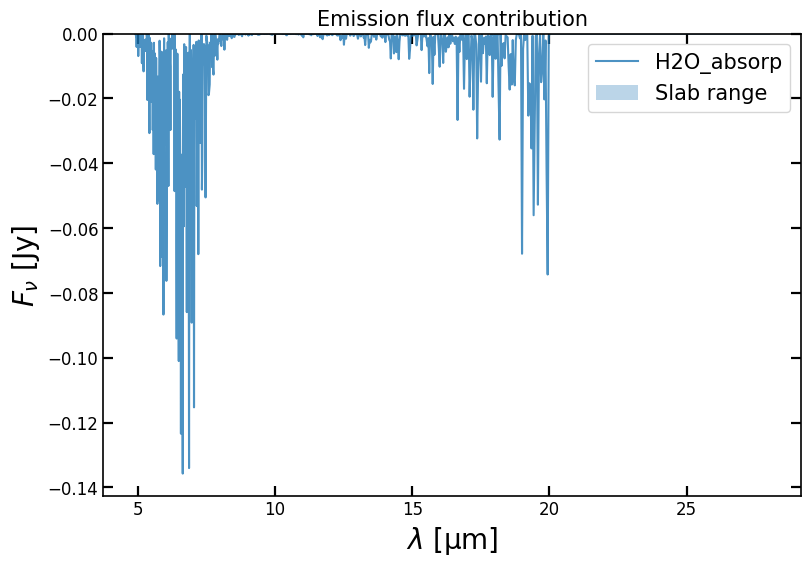

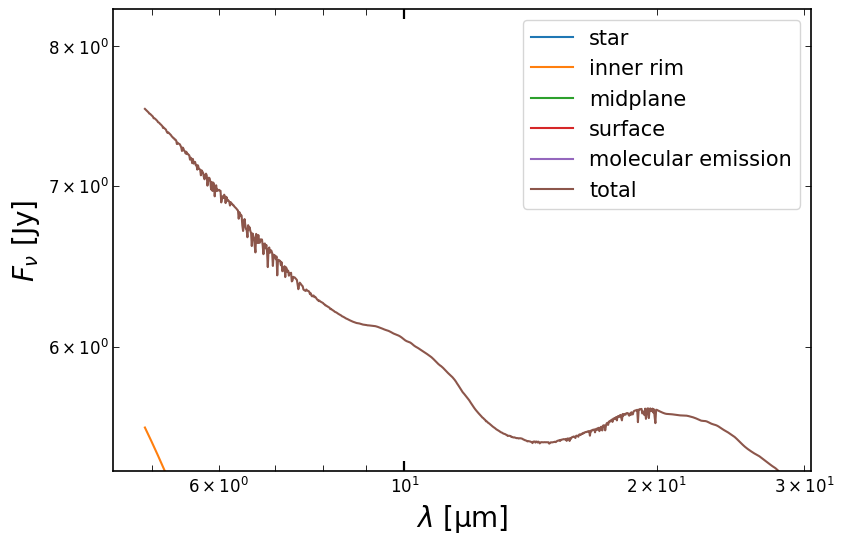

In [48]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


-----------
H2O_absorp
ColDens_tmin 250
ColDens_slope 2.095903274289384
logColDens_min 16.0
inner_part_temp [300 350 400 450 500 550 600 650 700]
inner_part [-2.59995424e-21 -5.11261745e-21 -8.22204946e-21 -1.15825671e-20
 -1.49067441e-20 -1.80872743e-20 -2.10170313e-20 -2.36353851e-20
 -2.59169529e-20]
upper_in_temp 750
lower_in_temp 250
upper_in -1.3930151338071807e-20
lower_in -4.763105535706157e-22
lower_out_temp 250
upper_out_temp 750
lower_out 0.0
upper_out 0.0
-----------
----------------
Keys in output dict
H2O_absorp
ColDens_tmin
250
ColDens_slope
2.095903274289384
logColDens_min
16.0
inner_part_temp
[300 350 400 450 500 550 600 650 700]
inner_part
[-2.59995424e-21 -5.11261745e-21 -8.22204946e-21 -1.15825671e-20
 -1.49067441e-20 -1.80872743e-20 -2.10170313e-20 -2.36353851e-20
 -2.59169529e-20]
upper_in_temp
750
lower_in_temp
250
upper_in
-1.3930151338071807e-20
lower_in
-4.763105535706157e-22
lower_out_temp
250
upper_out_temp
750
lower_out
0.0
upper_out
0.0
-----------
H2O_abs

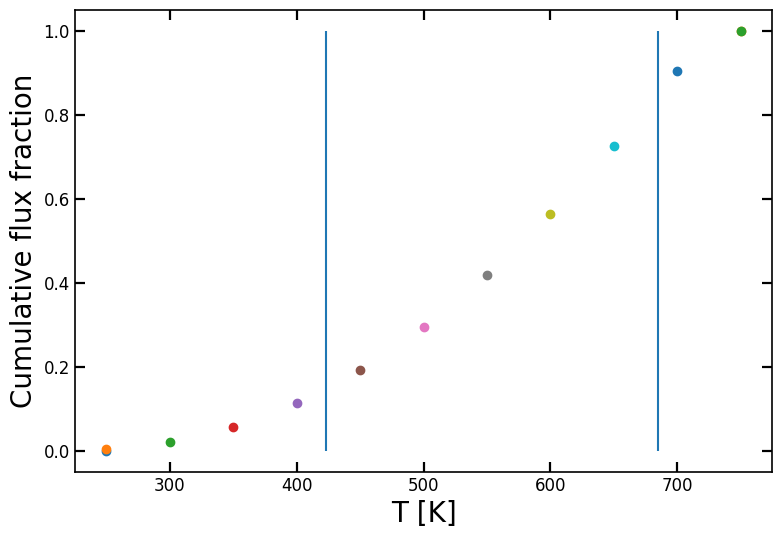

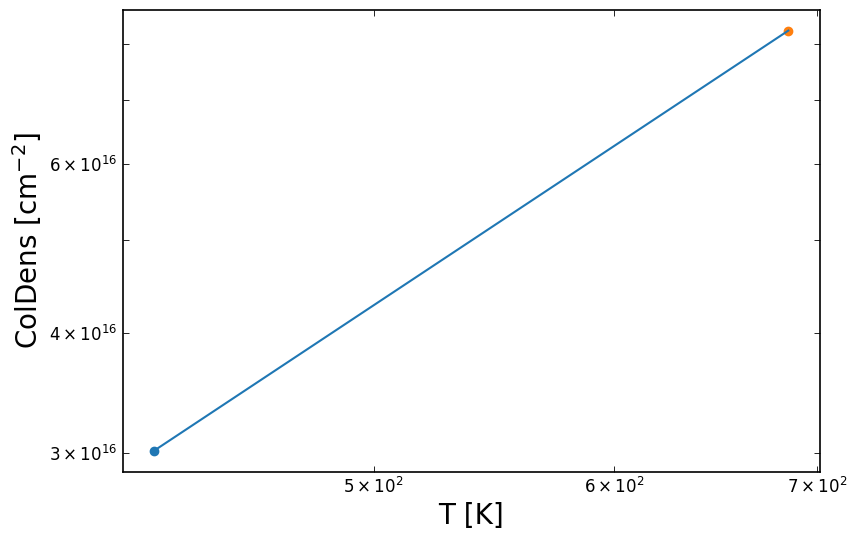

tmax,tmin 750 250
t at max,t at min 684.7727000305538 423.36323165366076
total radial range
1.0 7.370436186356618


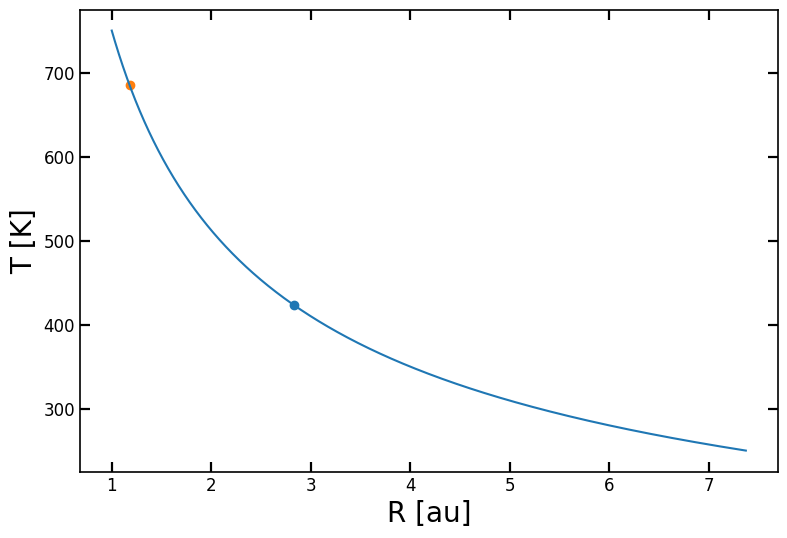

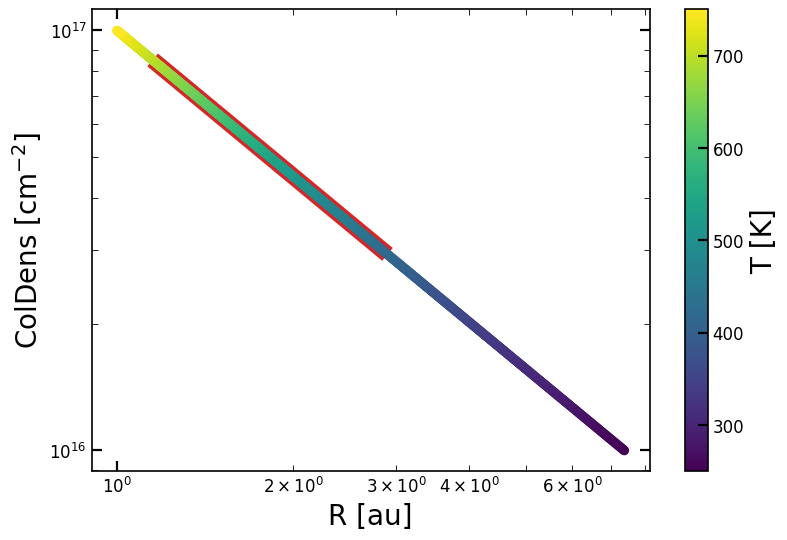

{'H2O_absorp': {'radius_eff': 2.570550105036111,
  'tmin,tmax': [423.36323165366076, 684.7727000305538],
  'cmin,cmax': [3.016382066067009e+16, 8.263818077098274e+16],
  'rout,rin': [2.828407934315037, 1.1798998264238763]}}

In [49]:
#calculating where the emission in the model is coming from
mod.extract_emission_quantities(debug=True)

In [50]:
#calculating the integrated flux of a molecule in a certain wavelength range
mod.calc_integrated_flux('H2O_absorp',wave_lims=[14,16])

-5.444942621533201e-17

### Dust absorption

In [51]:
# this dictonary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_abs':50.3,
         'tmax_abs':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-16,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
         'q_abs':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0,
#         'Rv':3.1,
#         'E(B-V)':0.5
         }

#here all factors are the same, but they can be different of course
test_fac=1e-7

abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}
#here all factors are the same, but they can be different of course
test_fac=1e-7

abundance_dict_absorption={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}

In [52]:
slab_dict={
            'CO2':{'ColDens':1e18,
                    'tmax':500,
                    'tmin':250,
                     'radius':0.3
                    },
            'H2O':{'ColDens':5e17,
                    'tmax':721.1,
                    'tmin':221,
                     'radius':0.3
                    }

          }

In [56]:
mod=complete_model()

In [57]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species={},absorp_species=abundance_dict_absorption,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='15_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['./LineData//binned_data/0', './LineData//binned_data/1', './LineData//binned_data/2', './LineData//binned_data/3', './LineData//binned_data/4', './LineData//binned_data/5', './LineData//binned_data/6', './LineData//binned_data/7', './LineData//binned_data/8', './LineData//binned_data/9']
Searching:
./LineData//binned_data/0/wavelength.npy
True
Searching:
./LineData//binned_data/1/wavelength.npy
True
Searching:
./LineData//binned_data/2/wavelength.npy
True
Searching:
./LineData//binned_data/3/wavelength.npy
True
Searching:
./LineData//binned_data/4/wavelength.npy
True
Searching:
./LineData//binned_data/5/wavelength.npy
True
Searching:
./LineData//binned_data/6/wavelength.npy
True
Searching:
./LineData//binned_data/7/wavelength.npy
True
Searching:
./LineData//binned_data/8/wavelength.npy
True
Searching:
./LineData//binned_data/9/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
./LineData//binned_data/9
------

Init 3.981590270996094e-05
Star 0.0010020732879638672
Inner rim 5.125999450683594e-05
Midplane 0.0004487037658691406
Surface 0.000347137451171875
Emission 0.0002689361572265625
Summing up 1.9073486328125e-05


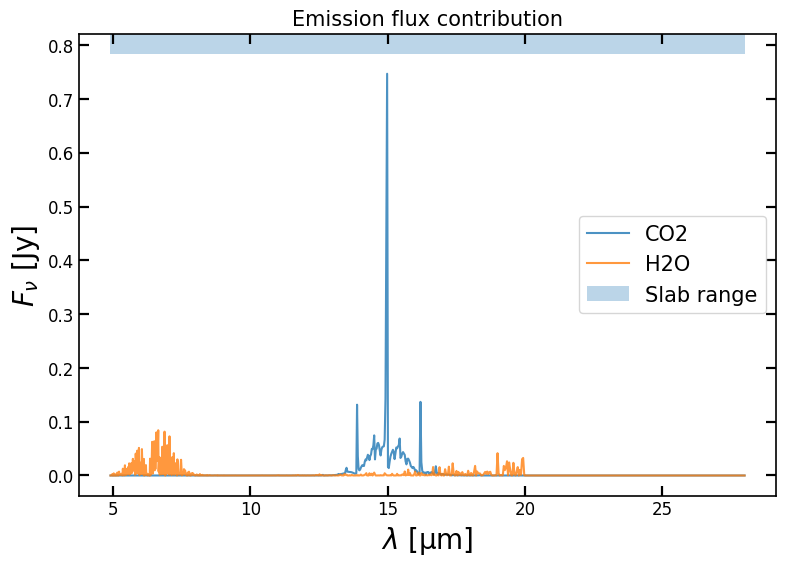

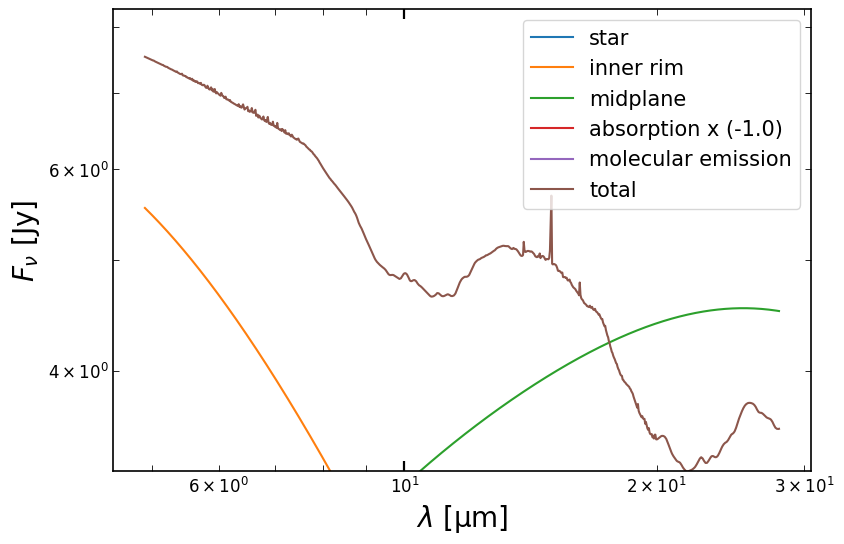

In [58]:

mod.run_model(variables=var_dict,dust_species={},absorp_species=abundance_dict_absorption,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


In [59]:
mod.calc_dust_masses(dust_path=dust_path,unit='msun',absorption=True)

{'MgOlivine0.1.Combined.Kappa_rv0.1.dat': 8.248652177652696e-07,
 'MgOlivine2.0.Combined.Kappa_rv2.0.dat': 1.6497304355305388e-05,
 'MgOlivine5.0.Combined.Kappa_rv5.0.dat': 4.124326088826348e-05,
 'MgPyroxene0.1.Combined.Kappa_rv0.1.dat': 7.114740422773215e-07,
 'MgPyroxene2.0.Combined.Kappa_rv2.0.dat': 1.422948084554643e-05,
 'MgPyroxene5.0.Combined.Kappa_rv5.0.dat': 3.557370211386607e-05,
 'Silica0.1.Combined.Kappa_rv0.1.dat': 4.913617604477751e-07,
 'Silica2.0.Combined.Kappa_rv2.0.dat': 9.827235208955502e-06,
 'Silica5.0.Combined.Kappa_rv5.0.dat': 2.4568088022388755e-05,
 'Enstatite0.1.Combined.Kappa_rv0.1.dat': 6.225397869926562e-07,
 'Enstatite2.0.Combined.Kappa_rv2.0.dat': 1.2450795739853124e-05,
 'Enstatite5.0.Combined.Kappa_rv5.0.dat': 3.112698934963281e-05,
 'Forsterite0.1.Combined.Kappa_rv0.1.dat': 7.337076060984878e-07,
 'Forsterite2.0.Combined.Kappa_rv2.0.dat': 1.4674152121969754e-05,
 'Forsterite5.0.Combined.Kappa_rv5.0.dat': 3.668538030492439e-05}